## Install BestiaPop

In [ ]:
#!pip install bestiapop

## Import required packages

In [12]:
import numpy as np
import os
import pandas as pd
from csv import reader
from bestiapop import bestiapop

## BestiaPop argument explanation

#### _`action`_
* **OPTION 1:** `download-nc4-file`: it will only download a particular NetCDF4 file from the cloud to your local disk, the source can be specified with the `data_source` parameter.
* **OPTION 2:** `convert-nc4`: it will only convert a local or cloud file from NC4 format to the output format specified with `output_type`.
* **OPTION 3:** `generate-climate-file`: the default action, it will generate a particular climate file like MET (for APSIM) or WTH (for DSSAT) using the parameters passed in as years, climate variable, etc.

#### _`coordinate_list`_
It will look for the closest grid cell of 0.5° for nasapower and 0.05° for silo data.
* **OPTION 1:** [ [ lat ] , [ lon ]...]
* **OPTION 2:** lists of lat/lon pairs where the first value is `latitude` and the second value is `longitude` (you need to host your lat/lon list in some web server and then provide the url)

#### _`data_source`_
`silo` (Australia only) or `nasapower` (world wide).

#### _`input_path`_
If the NetCDF files to be processed are stored locally, this path will be used to look for all the files required to extract data from the different year, latitude and longitude ranges.

#### _`climate_variables`_
`'radiation'`, `'max_temp'`, `'min_temp'`, `'daily_rain’`

#### _`year_range`_
A starting and ending year separated by a dash, example: "2012-2016“ .

#### _`output_type`_
`met`, `wth` or `csv`

#### _`output_path`_
The path where generated output files will be stored.

## Example 1: Download MET file for two lat/lon combinations from NASAPOWER

In [18]:
# Step 1: Define variables to pass in to Bestiapop
coordinate_list = [[-31.847869, -60.537849],[-32.487802, -58.345142]] 
action='generate-climate-file'
data_source='nasapower'
year_range='2020-2020'
climate_variables=['radiation', 'max_temp', 'min_temp', 'daily_rain']
output_type='met'
output_path=r'C:\Users\uqjojeda\Dropbox\testbestiapop\test'

# Step 2: Run BestiaPop and download data
final_df = pd.DataFrame()

for coord in coordinate_list:
    print('Fetching data for {}/{}'.format(coord[0], coord[1]))
    climate_data = bestiapop.CLIMATEBEAST(
        action='generate_met',
        data_source=data_source,
        output_path=output_path,
        output_type=output_type,
        input_path=None,
        climate_variables=climate_variables,
        year_range=year_range,
        lat_range=[coord[0]],
        lon_range=[coord[1]],
        multiprocessing=None
          )
    data = climate_data.process_records(action)
    final_df = final_df.append(data, ignore_index=True)

2021-06-06 13:55:31 - POPBEAST - Extracting data and converting to met format
2021-06-06 13:55:31 - POPBEAST.NASAPOWER_CONNECTOR - Generating DataFrames


Fetching data for -31.847869/-60.537849
Total Progress:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-06 13:55:31 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable radiation
2021-06-06 13:55:31 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2020
2021-06-06 13:55:31 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat -31.847869 - Lon -60.537849 for Year 2020
2021-06-06 13:55:31 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-06-06 13:55:31 - POPBEAST.NASAPOWER_CONNECTOR - Need to get data from the NASA Power Cloud
2021-06-06 13:55:34 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable max_temp
2021-06-06 13:55:34 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2020
2021-06-06 13:55:34 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat -31.847869 - Lon -60.537849 for Year 2020
2021-06-06 13:55:34 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-06-06 13:55:34 - POPBEAST.NASAPOWER_CONNECTOR - Need to get data from

Total Progress: 100%|####################################################################| 1/1 [00:11<00:00, 11.86s/it]

2021-06-06 13:55:43 - POPBEAST - Extracting data and converting to met format
2021-06-06 13:55:43 - POPBEAST.NASAPOWER_CONNECTOR - Generating DataFrames



Fetching data for -32.487802/-58.345142
Total Progress:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-06 13:55:43 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable radiation
2021-06-06 13:55:43 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2020
2021-06-06 13:55:43 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat -32.487802 - Lon -58.345142 for Year 2020
2021-06-06 13:55:43 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-06-06 13:55:43 - POPBEAST.NASAPOWER_CONNECTOR - Need to get data from the NASA Power Cloud
2021-06-06 13:55:46 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable max_temp
2021-06-06 13:55:46 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2020
2021-06-06 13:55:46 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat -32.487802 - Lon -58.345142 for Year 2020
2021-06-06 13:55:46 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-06-06 13:55:46 - POPBEAST.NASAPOWER_CONNECTOR - Need to get data from

Total Progress: 100%|####################################################################| 1/1 [00:11<00:00, 11.59s/it]


## Example 2: Download MET file for a list of lat/lon combinations from NASAPOWER

### Step 1: Define variables to pass in to Bestiapop

In [45]:
# Step 1: Define variables to pass in to Bestiapop
url = "https://raw.githubusercontent.com/JJguri/bestiapop/master/sample-data/bpop_tassie_example.csv"
df = pd.read_csv(url)
coordinate_list = df.values.tolist()
action='generate-climate-file' 
data_source='nasapower'
year_range='2020-2020'
climate_variables=['radiation', 'max_temp', 'min_temp', 'daily_rain']
output_type='met'
output_path=r'C:\Users\uqjojeda\Dropbox\testbestiapop\test'

# Step 2: Run BestiaPop and download data
final_df = pd.DataFrame()

for coord in coordinate_list:
    print('Fetching data for {}/{}'.format(coord[0], coord[1]))
    climate_data = bestiapop.CLIMATEBEAST(
        action='generate_met',
        data_source=data_source,
        output_path=output_path,
        output_type=output_type,
        input_path=None,
        climate_variables=climate_variables,
        year_range=year_range,
        lat_range=[coord[0]],
        lon_range=[coord[1]],
        multiprocessing=None
          )
    data = climate_data.process_records(action)
    final_df = final_df.append(data, ignore_index=True)

2021-06-07 09:11:03 - POPBEAST - Extracting data and converting to met format
2021-06-07 09:11:03 - POPBEAST.NASAPOWER_CONNECTOR - Generating DataFrames


Fetching data for -39.6/144.0
Total Progress:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-07 09:11:03 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable radiation
2021-06-07 09:11:03 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2020
2021-06-07 09:11:03 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat -39.6 - Lon 144.0 for Year 2020
2021-06-07 09:11:03 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-06-07 09:11:03 - POPBEAST.NASAPOWER_CONNECTOR - Need to get data from the NASA Power Cloud
2021-06-07 09:11:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable max_temp
2021-06-07 09:11:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2020
2021-06-07 09:11:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat -39.6 - Lon 144.0 for Year 2020
2021-06-07 09:11:06 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-06-07 09:11:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable min_

Total Progress: 100%|####################################################################| 1/1 [00:03<00:00,  3.16s/it]

2021-06-07 09:11:06 - POPBEAST - Extracting data and converting to met format
2021-06-07 09:11:06 - POPBEAST.NASAPOWER_CONNECTOR - Generating DataFrames



Fetching data for -39.65/144.0
Total Progress:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-07 09:11:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable radiation
2021-06-07 09:11:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2020
2021-06-07 09:11:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat -39.65 - Lon 144.0 for Year 2020
2021-06-07 09:11:06 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-06-07 09:11:06 - POPBEAST.NASAPOWER_CONNECTOR - Need to get data from the NASA Power Cloud
2021-06-07 09:11:09 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable max_temp
2021-06-07 09:11:09 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2020
2021-06-07 09:11:09 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat -39.65 - Lon 144.0 for Year 2020
2021-06-07 09:11:09 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-06-07 09:11:09 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable mi

Total Progress: 100%|####################################################################| 1/1 [00:02<00:00,  2.98s/it]

2021-06-07 09:11:10 - POPBEAST - Extracting data and converting to met format
2021-06-07 09:11:10 - POPBEAST.NASAPOWER_CONNECTOR - Generating DataFrames



Fetching data for -39.65/144.05
Total Progress:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-07 09:11:10 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable radiation
2021-06-07 09:11:10 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2020
2021-06-07 09:11:10 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat -39.65 - Lon 144.05 for Year 2020
2021-06-07 09:11:10 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-06-07 09:11:10 - POPBEAST.NASAPOWER_CONNECTOR - Need to get data from the NASA Power Cloud
2021-06-07 09:11:13 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable max_temp
2021-06-07 09:11:13 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2020
2021-06-07 09:11:13 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat -39.65 - Lon 144.05 for Year 2020
2021-06-07 09:11:13 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-06-07 09:11:13 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable 

Total Progress: 100%|####################################################################| 1/1 [00:03<00:00,  3.12s/it]

2021-06-07 09:11:13 - POPBEAST - Extracting data and converting to met format
2021-06-07 09:11:13 - POPBEAST.NASAPOWER_CONNECTOR - Generating DataFrames



Fetching data for -39.7/143.95
Total Progress:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-07 09:11:13 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable radiation
2021-06-07 09:11:13 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2020
2021-06-07 09:11:13 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat -39.7 - Lon 143.95 for Year 2020
2021-06-07 09:11:13 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-06-07 09:11:13 - POPBEAST.NASAPOWER_CONNECTOR - Need to get data from the NASA Power Cloud
2021-06-07 09:11:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable max_temp
2021-06-07 09:11:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2020
2021-06-07 09:11:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat -39.7 - Lon 143.95 for Year 2020
2021-06-07 09:11:16 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-06-07 09:11:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable mi

Total Progress: 100%|####################################################################| 1/1 [00:03<00:00,  3.44s/it]

2021-06-07 09:11:16 - POPBEAST - Extracting data and converting to met format
2021-06-07 09:11:16 - POPBEAST.NASAPOWER_CONNECTOR - Generating DataFrames



Fetching data for -39.7/144.0
Total Progress:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-07 09:11:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable radiation
2021-06-07 09:11:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2020
2021-06-07 09:11:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat -39.7 - Lon 144.0 for Year 2020
2021-06-07 09:11:16 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-06-07 09:11:16 - POPBEAST.NASAPOWER_CONNECTOR - Need to get data from the NASA Power Cloud
2021-06-07 09:11:19 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable max_temp
2021-06-07 09:11:19 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2020
2021-06-07 09:11:19 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat -39.7 - Lon 144.0 for Year 2020
2021-06-07 09:11:19 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-06-07 09:11:19 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable min_

Total Progress: 100%|####################################################################| 1/1 [00:02<00:00,  2.91s/it]

2021-06-07 09:11:19 - POPBEAST - Extracting data and converting to met format
2021-06-07 09:11:19 - POPBEAST.NASAPOWER_CONNECTOR - Generating DataFrames



Fetching data for -39.7/144.05
Total Progress:   0%|                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-07 09:11:19 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable radiation
2021-06-07 09:11:19 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2020
2021-06-07 09:11:19 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat -39.7 - Lon 144.05 for Year 2020
2021-06-07 09:11:19 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-06-07 09:11:19 - POPBEAST.NASAPOWER_CONNECTOR - Need to get data from the NASA Power Cloud


Total Progress:   0%|                                                                            | 0/1 [00:02<?, ?it/s]


KeyboardInterrupt: 

## Example 3: Download climate data for two lat/lon combinations from SILO and create dataframe 

In [35]:
# Step 1: Define variables to pass in to Bestiapop

coordinate_list = [[-39.6,144],[-39.65,144],[-39.65,144.05],[-39.7,143.95],[-39.7,144],[-39.7,144.05],
                  [-39.7,144.1],[-39.75,144],[-39.75,144.05],[-39.75,144.1]]
action='generate-climate-file' 
data_source='silo'
year_range='2019-2020'
climate_variables=['radiation', 'max_temp', 'min_temp', 'daily_rain']
output_type='dataframe'
output_path=None

# Step 2: Run BestiaPop and download data

final_df = pd.DataFrame()

for coord in coordinate_list:
    print('Fetching data for {}/{}'.format(coord[0], coord[1]))
    climate_data = bestiapop.CLIMATEBEAST(
        action='generate_met',
        data_source=data_source,
        output_path=output_path,
        output_type=output_type,
        input_path=None,
        climate_variables=climate_variables,
        year_range=year_range,
        lat_range=[coord[0]],
        lon_range=[coord[1]],
        multiprocessing=None
          )
    data = climate_data.process_records(action)
    final_df = final_df.append(data, ignore_index=True)

# Show the final dataframe
final_df

2021-06-07 09:03:22 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -39.6/144
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  4.57it/s]

2021-06-07 09:03:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.65/144
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  4.38it/s]

2021-06-07 09:03:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.65/144.05
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  4.74it/s]

2021-06-07 09:03:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.7/143.95
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  4.45it/s]

2021-06-07 09:03:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.7/144
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  4.45it/s]

2021-06-07 09:03:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.7/144.05
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  4.35it/s]

2021-06-07 09:03:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.7/144.1
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  4.57it/s]

2021-06-07 09:03:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.75/144
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  4.50it/s]

2021-06-07 09:03:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.75/144.05
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  4.32it/s]

2021-06-07 09:03:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.75/144.1
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  4.40it/s]


,lon,lat,year,day,radn,maxt,mint,rain
0,144.0,-39.60,2019,1,20.5,21.0,12.5,0.0
1,144.0,-39.60,2019,2,13.5,20.6,14.3,0.0
2,144.0,-39.60,2019,3,27.9,26.2,9.6,0.0
3,144.0,-39.60,2019,4,17.1,29.3,17.1,0.0
4,144.0,-39.60,2019,5,21.5,20.4,14.6,0.0
...,...,...,...,...,...,...,...,...
7305,144.1,-39.75,2020,362,9.0,22.1,14.4,0.2
7306,144.1,-39.75,2020,363,27.1,16.4,9.8,3.2
7307,144.1,-39.75,2020,364,13.3,18.8,11.1,0.0
7308,144.1,-39.75,2020,365,16.2,18.8,13.0,0.1


## Calculating yearly statistics

Let's calculate some statistics base on the climate data we retrieved from SILO

> NOTE: here we presente the sum of rain and radiation and the mean of daily minimum and maximum temperature across years. You can change the parameters you want to get lookin at the [GroupBy](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html) documentation.

In [36]:
#calculate yearly mean of mint and maxt (degree C) and cummulative radn (MJ m-2) and rain (mm) during across years and lat/lon combinations
mini = final_df.groupby(['lon','lat','year'], as_index=True)['maxt'].mean().round(decimals=1)
maxi = final_df.groupby(['lon','lat','year'], as_index=True)['mint'].mean().round(decimals=1)
radn = final_df.groupby(['lon','lat','year'], as_index=True)['radn'].sum().round(decimals=1)
rain = final_df.groupby(['lon','lat','year'], as_index=True)['rain'].sum().round(decimals=1)
st0 = pd.merge(radn, mini, on=(['lon','lat','year']), how='outer')
st00 = pd.merge(maxi, rain, on=(['lon','lat','year']), how='outer')
st_final = pd.merge(st0, st00, on=(['lon','lat','year']), how='outer')
st_final

#Save the statistical summary in the current dir
#st_final.to_csv(os.getcwd())

radn  maxt  mint   rain
lon    lat    year                           
143.95 -39.70 2019  4462.1  17.4  10.4  720.9
              2020  4096.8  17.0  10.2  923.0
144.00 -39.75 2019  4452.3  17.4  10.3  797.4
              2020  4088.3  17.0  10.2  957.7
       -39.70 2019  4465.3  17.4  10.4  745.9
              2020  4103.5  17.1  10.2  948.0
       -39.65 2019  4482.1  17.5  10.4  707.8
              2020  4115.4  17.1  10.3  946.1
       -39.60 2019  4498.2  17.5  10.5  676.9
              2020  4128.4  17.1  10.4  938.1
144.05 -39.75 2019  4459.6  17.3  10.3  833.8
              2020  4093.6  16.9  10.2  977.7
       -39.70 2019  4470.8  17.5  10.4  782.1
              2020  4106.3  17.1  10.3  962.6
       -39.65 2019  4488.6  17.5  10.5  747.9
              2020  4120.6  17.1  10.3  963.2
144.10 -39.75 2019  4458.8  17.5  10.5  851.5
              2020  4098.4  17.1  10.3  984.2
       -39.70 2019  4471.3  17.5  10.5  800.7
              2020  4113.1  17.1  10.3  980.6

## This code re-structure the datasets before mapping

In [37]:
#Preparinf dataset to plot
radnrain = final_df.groupby(['lat', 'lon','year'],as_index=True).sum()
temp = final_df.groupby(['lat', 'lon','year'],as_index=True).mean()
#Reseting index
Pre_nc = radnrain.reset_index()
#Set indexes
Pre_nc.set_index(['lat', 'lon', 'year'], inplace=True)
df1 = Pre_nc[~Pre_nc.index.duplicated(keep='first')]
#From 2D dataframe to xarray
nc_r = df1.to_xarray()
#Reseting index
Pre_nc2 = temp.reset_index()
#Set indexes
Pre_nc2.set_index(['lat', 'lon', 'year'], inplace=True)
df2 = Pre_nc2[~Pre_nc2.index.duplicated(keep='first')]
#From 2D dataframe to xarray
nc_t = df2.to_xarray()

## Mapping rainfall

> NOTE: Each 5 km grid represents the mean (across years) of cumulative rainfall during the year

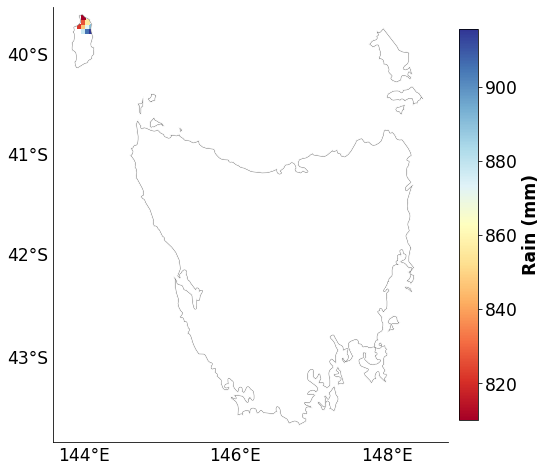

In [38]:
#Packages required for the mapping functions
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#Plotting single map with cumulative rain during the year <--update central longitude in 'projection=ccrs.Mercator(' accordingly with the region of interest
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=146)),figsize=(10,8))
p=nc_r.rain.mean(dim=('year'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.RdYlBu, zorder=1, add_colorbar=False)

#Arranguing features, borders and axis labels 
gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=True,dms=True, x_inline=False, y_inline=False)
ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor = "grey", linewidth=0.3, zorder=1)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)

#you will need to update the 3 following lines accordingly with the region of interest
ax.set_extent([143.6, 148.8, -43.8, -39.5], crs=ccrs.PlateCarree())
gl.xlocator = mticker.FixedLocator([144, 146, 148])
gl.ylocator = mticker.FixedLocator([-40, -41, -42,-43])
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 17, 'color': 'k'}
gl.ylabel_style = {'size': 17, 'color': 'k'}
ax.outline_patch.set_visible(False)
ax.spines['left'].set_visible(True)  
ax.spines['bottom'].set_visible(True)

#Setting colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Rain (mm)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

#Save the map to the current directory
#plt.savefig(os.getcwd(), dpi=600, bbox_inches='tight', pad_inches=0)

## Mapping solar radiation

> NOTE: Each 5 km grid represents the mean (across years) of cumulative solar dariation during the year

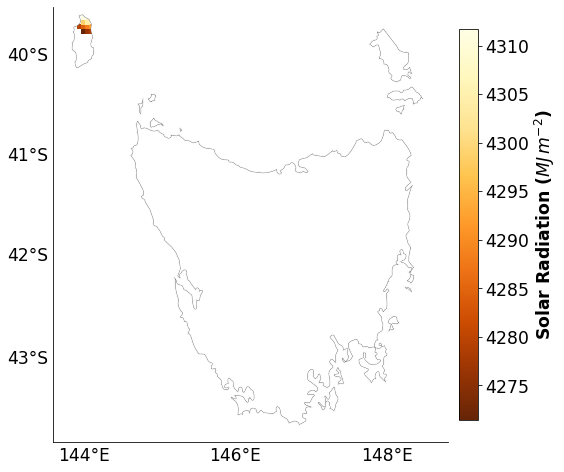

In [39]:
#Packages required for the mapping functions
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#Plotting single map with cumulative rain during the year <--update central longitude in 'projection=ccrs.Mercator(' accordingly with the region of interest
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=146)),figsize=(10,8))
p=nc_r.radn.mean(dim=('year'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.YlOrBr_r, zorder=1, add_colorbar=False)

#Arranguing features, borders and axis labels 
gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=True,dms=True, x_inline=False, y_inline=False)
ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor = "grey", linewidth=0.3, zorder=1)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)

#you will need to update the 3 following lines accordingly with the region of interest
ax.set_extent([143.6, 148.8, -43.8, -39.5], crs=ccrs.PlateCarree())
gl.xlocator = mticker.FixedLocator([144, 146, 148])
gl.ylocator = mticker.FixedLocator([-40, -41, -42,-43])
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 17, 'color': 'k'}
gl.ylabel_style = {'size': 17, 'color': 'k'}
ax.outline_patch.set_visible(False)
ax.spines['left'].set_visible(True)  
ax.spines['bottom'].set_visible(True)

#Setting colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Solar Radiation ($MJ\,m^{-2}$)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

#Save the map to the current directory
#plt.savefig(os.getcwd(), dpi=600, bbox_inches='tight', pad_inches=0)

## Mapping minimum temperature

> NOTE: Each 5 km grid represents the mean (across years) of the mean minimum temperature during the year

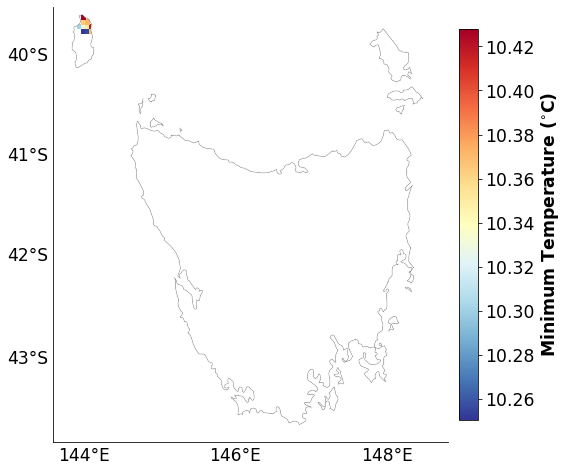

In [40]:
#Packages required for the mapping functions
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#Plotting single map with cumulative rain during the year <--update central longitude in 'projection=ccrs.Mercator(' accordingly with the region of interest
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=146)),figsize=(10,8))
p=nc_t.mint.mean(dim=('year'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.RdYlBu_r, zorder=1, add_colorbar=False)

#Arranguing features, borders and axis labels 
gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=True,dms=True, x_inline=False, y_inline=False)
ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor = "grey", linewidth=0.3, zorder=1)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)

#you will need to update the 3 following lines accordingly with the region of interest
ax.set_extent([143.6, 148.8, -43.8, -39.5], crs=ccrs.PlateCarree())
gl.xlocator = mticker.FixedLocator([144, 146, 148])
gl.ylocator = mticker.FixedLocator([-40, -41, -42,-43])
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 17, 'color': 'k'}
gl.ylabel_style = {'size': 17, 'color': 'k'}
ax.outline_patch.set_visible(False)
ax.spines['left'].set_visible(True)  
ax.spines['bottom'].set_visible(True)

#Setting colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Minimum Temperature ($^{\circ}$C)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

#Save the map to the current directory
#plt.savefig(os.getcwd(), dpi=600, bbox_inches='tight', pad_inches=0)

## Mapping minimum temperature

> NOTE: Each 5 km grid represents the mean (across years) of the mean maximum temperature during the year

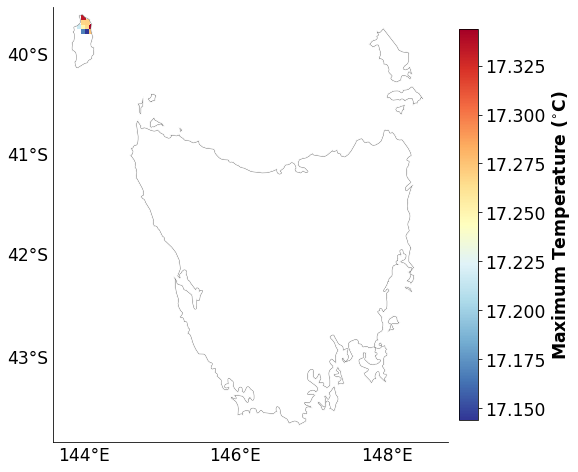

In [41]:
#Packages required for the mapping functions
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#Plotting single map with cumulative rain during the year <--update central longitude in 'projection=ccrs.Mercator(' accordingly with the region of interest
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=146)),figsize=(10,8))
p=nc_t.maxt.mean(dim=('year'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.RdYlBu_r, zorder=1, add_colorbar=False)

#Arranguing features, borders and axis labels 
gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=True,dms=True, x_inline=False, y_inline=False)
ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor = "grey", linewidth=0.3, zorder=1)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)

#you will need to update the 3 following lines accordingly with the region of interest
ax.set_extent([143.6, 148.8, -43.8, -39.5], crs=ccrs.PlateCarree())
gl.xlocator = mticker.FixedLocator([144, 146, 148])
gl.ylocator = mticker.FixedLocator([-40, -41, -42,-43])
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 17, 'color': 'k'}
gl.ylabel_style = {'size': 17, 'color': 'k'}
ax.outline_patch.set_visible(False)
ax.spines['left'].set_visible(True)  
ax.spines['bottom'].set_visible(True)

#Setting colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Maximum Temperature ($^{\circ}$C)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

#Save the map to the current directory
#plt.savefig(os.getcwd(), dpi=600, bbox_inches='tight', pad_inches=0)